In [18]:
import os
import sys
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from torchvision.models import ResNet50_Weights


In [19]:
csv_dir = '/home/vsuciu/data/hdvila/videos/bboxes'

In [20]:
def imagenet_hist(csv_fps):
    for fp in csv_fps:
        video_df = pd.read_csv(fp)
        unique = video_df.groupby(['imagenet_label'], as_index=False).count()

In [21]:
csv_fps = [os.path.join(csv_dir, d) for d in os.listdir(csv_dir) if d[-4:] == '.csv']

In [22]:
video_df = pd.read_csv(csv_fps[0])
video_df

,frame_idx,x1,y1,x2,y2,coco_label,coco_label_score,imagenet_label,imagenet_label_score
0,50,536.0,1320.0,168.0,917.0,29,0.274800,volleyball,0.365488
1,50,540.0,1321.0,166.0,904.0,32,0.296998,volleyball,0.385834
2,50,556.0,1309.0,186.0,916.0,37,0.194854,volleyball,0.301081
3,50,550.0,1329.0,161.0,929.0,41,0.245860,volleyball,0.391618
4,50,542.0,1351.0,157.0,931.0,45,0.165722,volleyball,0.366610
...,...,...,...,...,...,...,...,...,...
506,2500,1.0,86.0,481.0,630.0,66,0.210311,rule,0.036090
507,2500,26.0,1070.0,144.0,1058.0,66,0.140938,digital watch,0.084933
508,2500,638.0,922.0,560.0,786.0,67,0.531089,digital watch,0.154304
509,2500,681.0,1006.0,242.0,457.0,73,0.352346,handkerchief,0.076354


## Count imagenet classes

In [29]:
model_meta = ResNet50_Weights.IMAGENET1K_V2
all_imgnet_classes = model_meta.meta['categories']
class_counter = Counter({label: 0 for label in all_imgnet_classes})

for fp in csv_fps:
    video_df = pd.read_csv(fp)
    for label in video_df['imagenet_label']:
        class_counter[label] += 1

In [30]:
nonzero_count = 0

for category in class_counter.keys():
    if class_counter[category] > 0:
        nonzero_count += 1
print(nonzero_count)

524


<BarContainer object of 1000 artists>

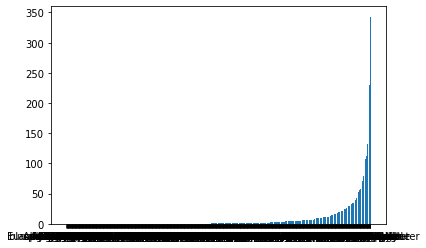

In [35]:
imgnet_count_list = [[category, class_counter[category]] for category in all_imgnet_classes]
imgnet_count_list.sort(key=lambda x: x[1])
plt.bar([element[0] for element in imgnet_count_list], [element[1] for element in imgnet_count_list])

In [38]:
for element in imgnet_count_list[-50:]:
    print(element)

['mask', 40]
["potter's wheel", 41]
['frying pan', 42]
['piggy bank', 42]
['cocktail shaker', 43]
['hourglass', 45]
['beaker', 47]
['jellyfish', 48]
['plastic bag', 48]
['punching bag', 48]
['ping-pong ball', 52]
['pick', 54]
['sorrel', 55]
['balloon', 56]
['dumbbell', 57]
['hair spray', 57]
['lighter', 57]
['modem', 57]
['rock beauty', 61]
['face powder', 62]
['iPod', 67]
['pill bottle', 67]
['bulletproof vest', 69]
['comic book', 71]
['neck brace', 72]
['black grouse', 79]
['ballpoint', 79]
['packet', 83]
['Petri dish', 83]
['velvet', 84]
['desktop computer', 86]
['oil filter', 102]
['cellular telephone', 106]
['binder', 107]
['nipple', 110]
['oxygen mask', 110]
['chain', 112]
['remote control', 113]
['whiskey jug', 130]
['dugong', 132]
['abaya', 138]
['notebook', 141]
['hand-held computer', 144]
['laptop', 167]
['cleaver', 177]
['croquet ball', 184]
['microphone', 230]
['knee pad', 242]
['Windsor tie', 314]
['milk can', 343]
